In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
## h2 dimer ##
# converged SCF energy = -2.25731392727015
# E(RCCSD) = -2.326809915582077  E_corr = -0.0694959883119262
# AFQMC energy: -2.326813 +/- 0.000003

In [37]:
afqmc_corr = -2.326813 - -2.25731392727015
print(afqmc_corr)
afqmc_err = 0.000003

-0.06949907272985012


In [19]:
data = '''
# thresh(occ,vir)        afqmc_corr        err          mp2_afqmc_corr   ccsd_corr         hf_cr           err           ccsd_cr0          err            ccsd_cr1         err           ccsd_cr2          err             ccsd_cr         err         ave_olp_ratio       err         ave_norb  max_norb ave_nelec  max_nelec  run_time
  (0.001, 0.0001)        -0.069316       0.000001        -0.069572       0.000000        -0.067635       0.000230        0.061524        0.000268        -0.069458       0.000357        0.006253        0.000313        -0.001681       0.000230        0.983472        0.000099        2.00    2       9.00    9       134.70
  (0.0005, 5e-05)        -0.069314       0.000001        -0.069570       0.000000        -0.068310       0.000274        0.062284        0.000324        -0.070551       0.000436        0.007262        0.000383        -0.001004       0.000275        0.983272        0.000118        2.00    2       9.00    9       134.60
  (0.0003, 3e-05)        -0.069317       0.000001        -0.069573       0.000000        -0.067769       0.000218        0.061553        0.000253        -0.069469       0.000344        0.006368        0.000304        -0.001548       0.000218        0.983456        0.000093        2.00    2       9.00    9       134.75
  (0.0001, 1e-05)        -0.069407       0.000000        -0.069497       0.000000        -0.067795       0.000226        0.061728        0.000269        -0.071085       0.000361        0.007745        0.000310        -0.001612       0.000226        0.983427        0.000100        2.00    2       10.00   10      145.90
  (1e-05, 1e-06)         -0.069381       0.000004        -0.069390       0.000000        -0.067624       0.000244        0.144032        0.000681        -0.227222       0.001120        0.081435        0.000674        -0.001756       0.000242        0.974135        0.000137        4.00    4       13.50   14      303.03
  (1e-06, 1e-07)         -0.069437       0.000007        -0.069438       0.000000        -0.066762       0.000236        0.142455        0.000674        -0.233156       0.001152        0.088025        0.000705        -0.002675       0.000231        0.968173        0.000143        4.00    4       16.00   16      368.57
  (0.0, 0.0)             -0.069491       0.000007        -0.069491       0.000000        -0.066941       0.000231        0.142447        0.000658        -0.241213       0.001170        0.096216        0.000733        -0.002550       0.000227        0.967264        0.000148        4.00    4       20.00   20      493.87'''

In [38]:
new_data = []
lines = data.splitlines()
for line in lines:
    columns = line.split()
    if len(columns)>1:
        if not line.startswith("#"): 
            new_data.append(columns)

new_data = np.array(new_data)

lno_thresh = []
for i in range(new_data.shape[0]):
    thresh_vir = new_data[:,1][i] # .split(sep=',')[1]
    thresh_vir = float(thresh_vir.strip('(),'))
    lno_thresh.append(thresh_vir)

lno_data = np.array(new_data[:,2:],dtype="float32")

lno_thresh = np.array(lno_thresh,dtype="float32")
lno_thresh[-1] = 1e-10 # last thresh = 0.0
lno_afqmc_corr = lno_data[:,0]
lno_afqmc_err = lno_data[:,1]
lno_afqmc_mp2_corr = lno_data[:,2]
lno_ccsd_corr = lno_data[:,3]
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr

hf_cr = lno_data[:,4]
hf_cr_err = lno_data[:,5]
ccsd_cr0 = lno_data[:,6]
ccsd_cr0_err = lno_data[:,7]
ccsd_cr1 = lno_data[:,8]
ccsd_cr1_err = lno_data[:,9]
ccsd_cr2 = lno_data[:,10]
ccsd_cr2_err = lno_data[:,11]
ccsd_cr = lno_data[:,12]
ccsd_cr_err = lno_data[:,13]
olp_ratio = lno_data[:,14]
olp_ratio_err = lno_data[:,15]

print(f'lno-threshold: {lno_thresh}')
print(f'lno-afqmc/ccsd correlation energy: {lno_afqmc_corr}')
print(f'lno-ccsd correlation energy: {lno_ccsd_corr}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: {lno_afqmc_mp2_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): {lno_afqmc_err}')
print(f'afqmc/ccsd correlation energy: {afqmc_corr:.6f} +/- {afqmc_err:6f}')
#print(f'ccsd correlation energy: {ccsd_corr:.6f}')

lno-threshold: [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06 1.e-07 1.e-10]
lno-afqmc/ccsd correlation energy: [-0.069316 -0.069314 -0.069317 -0.069407 -0.069381 -0.069437 -0.069491]
lno-ccsd correlation energy: [0. 0. 0. 0. 0. 0. 0.]
mp2 corrected lno-afqmc/ccsd correlation energy: [-0.069572 -0.06957  -0.069573 -0.069497 -0.06939  -0.069438 -0.069491]
lno-afqmc/ccsd energy uncertainty (1 sigma): [1.e-06 1.e-06 1.e-06 0.e+00 4.e-06 7.e-06 7.e-06]
afqmc/ccsd correlation energy: -0.069499 +/- 0.000003


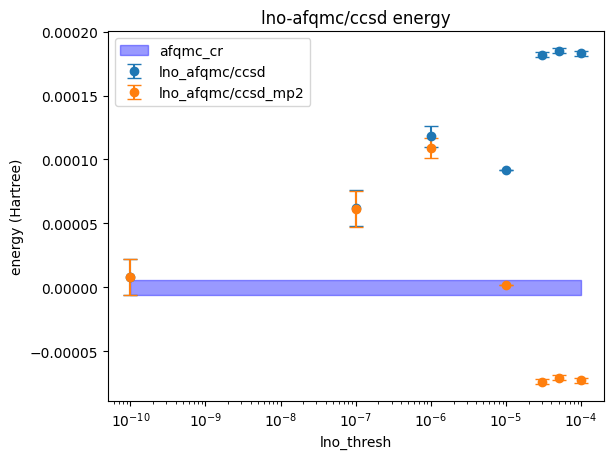

In [39]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
#plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
#plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()

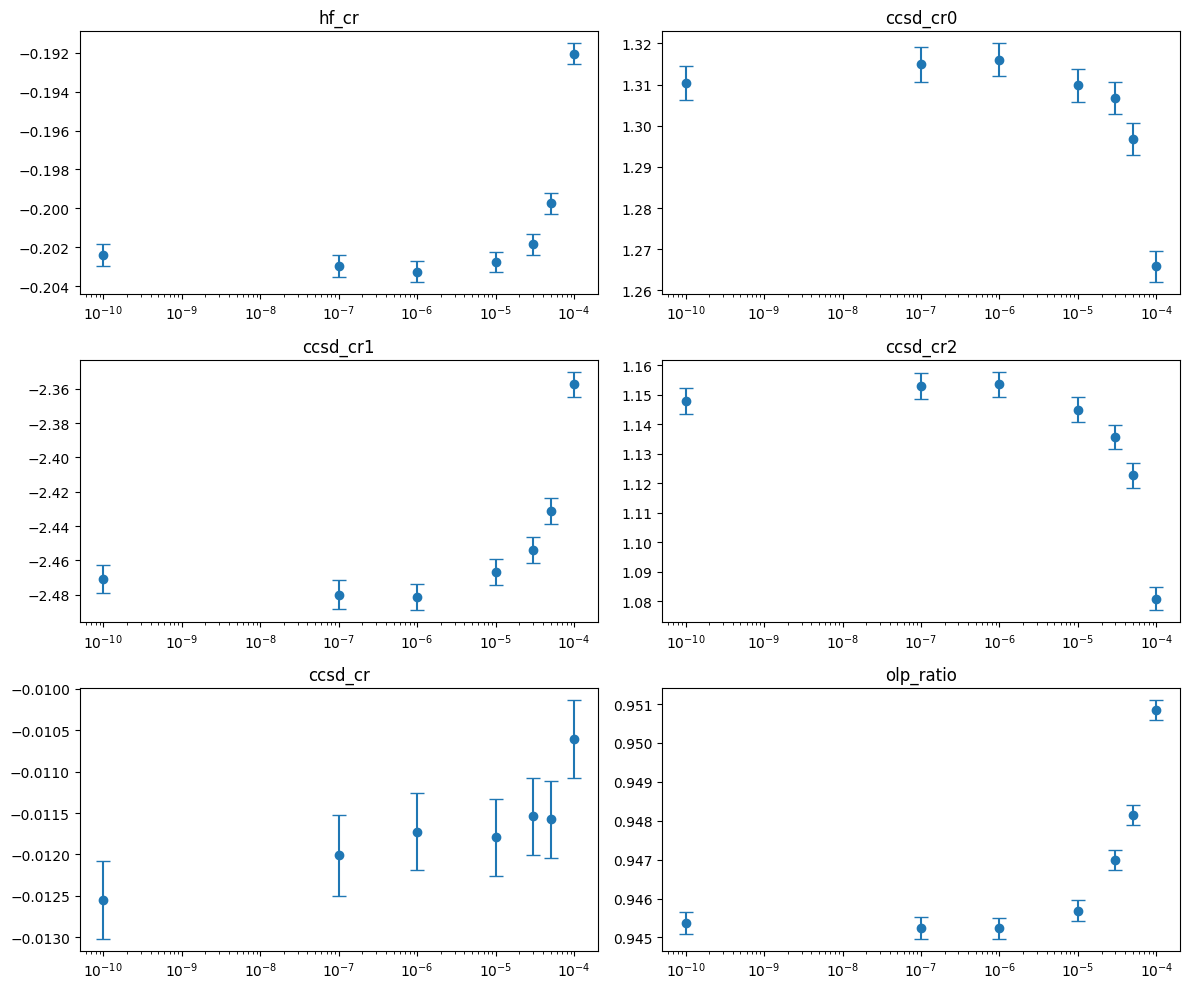

In [106]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].errorbar(lno_thresh,hf_cr,yerr=hf_cr_err*2,fmt='o',capsize=5,label='hf_cr')
axs[0, 0].set_title("hf_cr")
axs[0, 0].set_xscale('log')

# Top-right
axs[0, 1].errorbar(lno_thresh,ccsd_cr0,yerr=ccsd_cr0_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[0, 1].set_title("ccsd_cr0")
axs[0, 1].set_xscale('log')

# Bottom-left
axs[1, 0].errorbar(lno_thresh,ccsd_cr1,yerr=ccsd_cr1_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[1, 0].set_title("ccsd_cr1")
axs[1, 0].set_xscale('log')

# Bottom-right
axs[1, 1].errorbar(lno_thresh,ccsd_cr2,yerr=ccsd_cr2_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[1, 1].set_title("ccsd_cr2")
axs[1, 1].set_xscale('log')

axs[2, 0].errorbar(lno_thresh,ccsd_cr,yerr=ccsd_cr_err*2,fmt='o',capsize=5,label='ccsd_cr')
axs[2, 0].set_title("ccsd_cr")
axs[2, 0].set_xscale('log')

axs[2, 1].errorbar(lno_thresh,olp_ratio,yerr=olp_ratio_err*2,fmt='o',capsize=5,label='olp_ratio')
axs[2, 1].set_title("olp_ratio")
axs[2, 1].set_xscale('log')

plt.tight_layout()
plt.show()

In [ ]:
## afmqc/rhf ##
# converged SCF energy = -76.0267469569854
# AFQMC energy: -76.2422 +/- 0.0006

In [31]:
hf_afqmc_cr = -76.2422 + 76.0267469569854
print(hf_afqmc_cr)
hf_afqmc_err = 0.0006*2

-0.21545304301459112


In [32]:
lno_thresh = np.array([0.0001,5e-05,3e-05,1e-05,1e-06])
lno_hf_afqmc_cr = np.array([-0.203700,-0.211810,-0.214200,-0.214472,-0.215400])-hf_afqmc_cr
lno_hf_afqmc_mp2_cr = np.array([-0.214904,-0.215170,-0.215594,-0.215483,-0.215404])-hf_afqmc_cr
lno_hf_afqmc_err = np.array([0.000424,0.000424,0.000479,0.000480,0.000424])*2

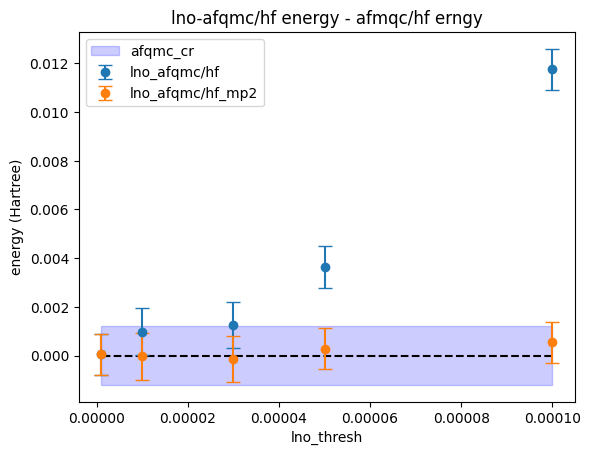

In [39]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
plt.plot(x,np.array([0]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_hf_afqmc_cr,yerr=lno_hf_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/hf')
plt.errorbar(lno_thresh,lno_hf_afqmc_mp2_cr,yerr=lno_hf_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/hf_mp2')
plt.fill_between(x, np.array([0]*100) + hf_afqmc_err, np.array([0]*100) - hf_afqmc_err, color='blue', alpha=0.2,label='afqmc_cr')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/hf energy - afmqc/hf erngy')
plt.legend()
plt.show()

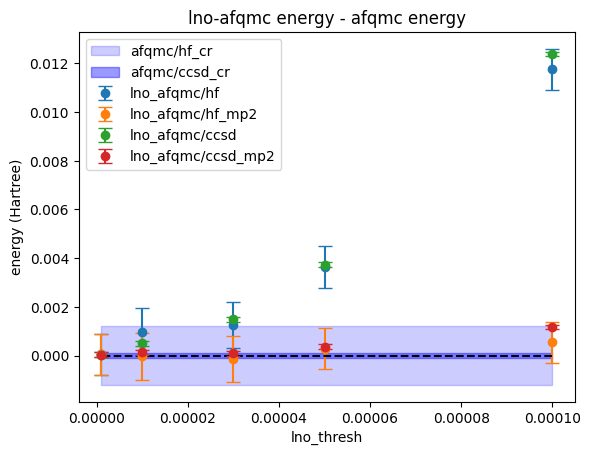

In [40]:
plt.errorbar(lno_thresh,lno_hf_afqmc_cr,yerr=lno_hf_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/hf')
plt.errorbar(lno_thresh,lno_hf_afqmc_mp2_cr,yerr=lno_hf_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/hf_mp2')
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
plt.plot(x,np.array([0]*100),color='black', linestyle='--')
plt.fill_between(x, np.array([0]*100) + hf_afqmc_err, np.array([0]*100) - hf_afqmc_err, color='blue', alpha=0.2,label='afqmc/hf_cr')

plt.errorbar(lno_thresh,lno_ccsd_afqmc_cr,yerr=lno_ccsd_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_ccsd_afqmc_mp2_cr,yerr=lno_ccsd_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
plt.fill_between(x, np.array([0]*100) + ccsd_afqmc_err, np.array([0]*100) - ccsd_afqmc_err, color='blue', alpha=0.4,label='afqmc/ccsd_cr')

plt.title('lno-afqmc energy - afqmc energy')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.legend()
plt.show()

In [3]:
# dimer
# converged SCF energy = -152.062490646928
# AFQMC energy: -152.49477 +/- 0.00009
# E(RCCSD) = -152.4871100502082  E_corr = -0.4246194032801924

In [12]:
np.set_printoptions(7,suppress=True)
afqmc_corr2 = -152.49477 - -152.062490646928
print(afqmc_corr2)
afqmc_err2 = 0.00009
ccsd_corr2 = -0.4246194032801924

-0.4322793530719764


In [7]:
lno_thresh = np.array([0.0001,5e-05,3e-05,1e-05,1e-06,1e-07,1e-10]) # last thresh = 0.0
lno_afqmc_corr2 = np.array([-0.405547,-0.420998,-0.424155,-0.428684,-0.430997,-0.430237,-0.432188])
lno_afqmc_err2 = np.array([0.000039,0.000043,0.000045,0.000046,0.000052,0.000058,0.000064])
lno_afqmc_mp2_corr2 = np.array([-0.429794,-0.431219,-0.431283,-0.431534,-0.431306,-0.430267,-0.432187])
lno_ccsd_corr2 = np.array([-0.401576,-0.415180,-0.417954,-0.421984,-0.424367,-0.424605,-0.424620])
lno_mp2_cr2 = lno_afqmc_mp2_corr2-lno_afqmc_corr2
lno_ccsd_mp2_corr2 = lno_ccsd_corr2+lno_mp2_cr2

hf_cr = np.array([-0.385261,-0.398932,-0.402009,-0.404409,-0.402281,-0.392942,-0.386223])
hf_cr_err = np.array([0.000284,0.000283,0.000285,0.000281,0.000286,0.000279,0.000271])
ccsd_cr0 = np.array([2.508104,2.575511,2.586473,2.673845,3.801218,5.249714,6.230421])
ccsd_cr0_err = np.array([0.002000,0.002024,0.002040,0.002072,0.003160,0.004218,0.004981])
ccsd_cr1 = np.array([-4.653559,-4.794245,-4.826849,-5.026496,-7.295214,-10.244130,-12.273217])
ccsd_cr1_err = np.array([0.003790,0.003894,0.003928,0.004013,0.006217,0.008361,0.009935])
ccsd_cr2 = np.array([2.125171,2.196669,2.218231,2.328377,3.465284,4.957122,5.996833])
ccsd_cr2_err = np.array([0.002041,0.002114,0.002133,0.002179,0.003281,0.004361,0.005161])
ccsd_cr = np.array([-0.020285,-0.022066,-0.022145,-0.024275,-0.028715,-0.037294,-0.045966])
ccsd_cr_err = np.array([0.000255,0.000250,0.000251,0.000245,0.000244,0.000231,0.000218])
olp_ratio = np.array([ 0.952700,0.949705,0.948441,0.945076,0.932129,0.911019,0.895819])
olp_ratio_err = np.array([0.000088,0.000093,0.000093,0.000095,0.000103,0.000113,0.000123])

print(f'lno-threshold: {lno_thresh}')
print(f'lno-afqmc/ccsd correlation energy: {lno_afqmc_corr}')
print(f'lno-ccsd correlation energy: {lno_ccsd_corr}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: {lno_afqmc_mp2_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): {lno_afqmc_err}')
print(f'afqmc/ccsd correlation energy: {afqmc_corr:.4f} +/- {afqmc_err}')

lno-threshold: [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06 1.e-07 1.e-10]


NameError: name 'lno_afqmc_corr' is not defined

In [13]:
lno_afqmc_mp2_corr2-afqmc_corr2

array([0.0024854, 0.0010604, 0.0009964, 0.0007454, 0.0009734, 0.0020124,
       0.0000924])

In [17]:
olp_ratio_fix = [olp_ratio[-1]]*len(olp_ratio)
print(olp_ratio_fix)
hf_cr_fix_ratio = hf_cr/olp_ratio
print(hf_cr_fix_ratio)

[0.895819, 0.895819, 0.895819, 0.895819, 0.895819, 0.895819, 0.895819]
[-0.4043886 -0.4200589 -0.4238629 -0.4279116 -0.4315722 -0.4313214
 -0.4311395]


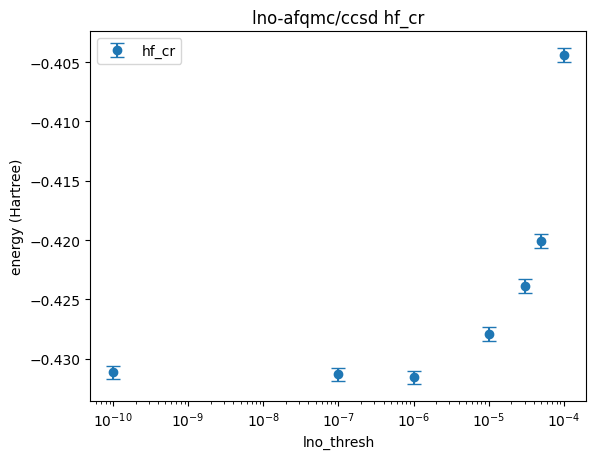

In [18]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
plt.errorbar(lno_thresh,hf_cr_fix_ratio,yerr=hf_cr_err*2,fmt='o',capsize=5,label='hf_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd hf_cr')
plt.legend()
plt.show()

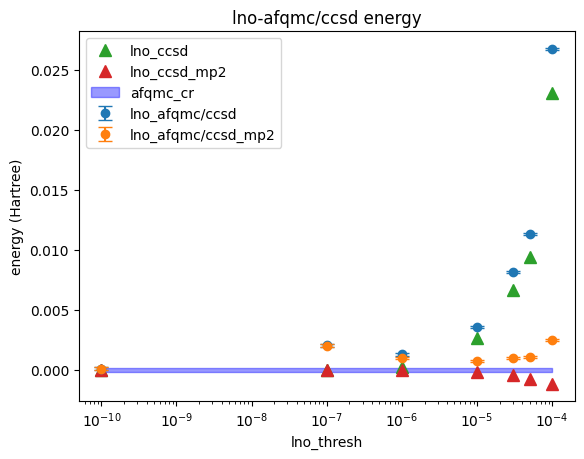

In [22]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()

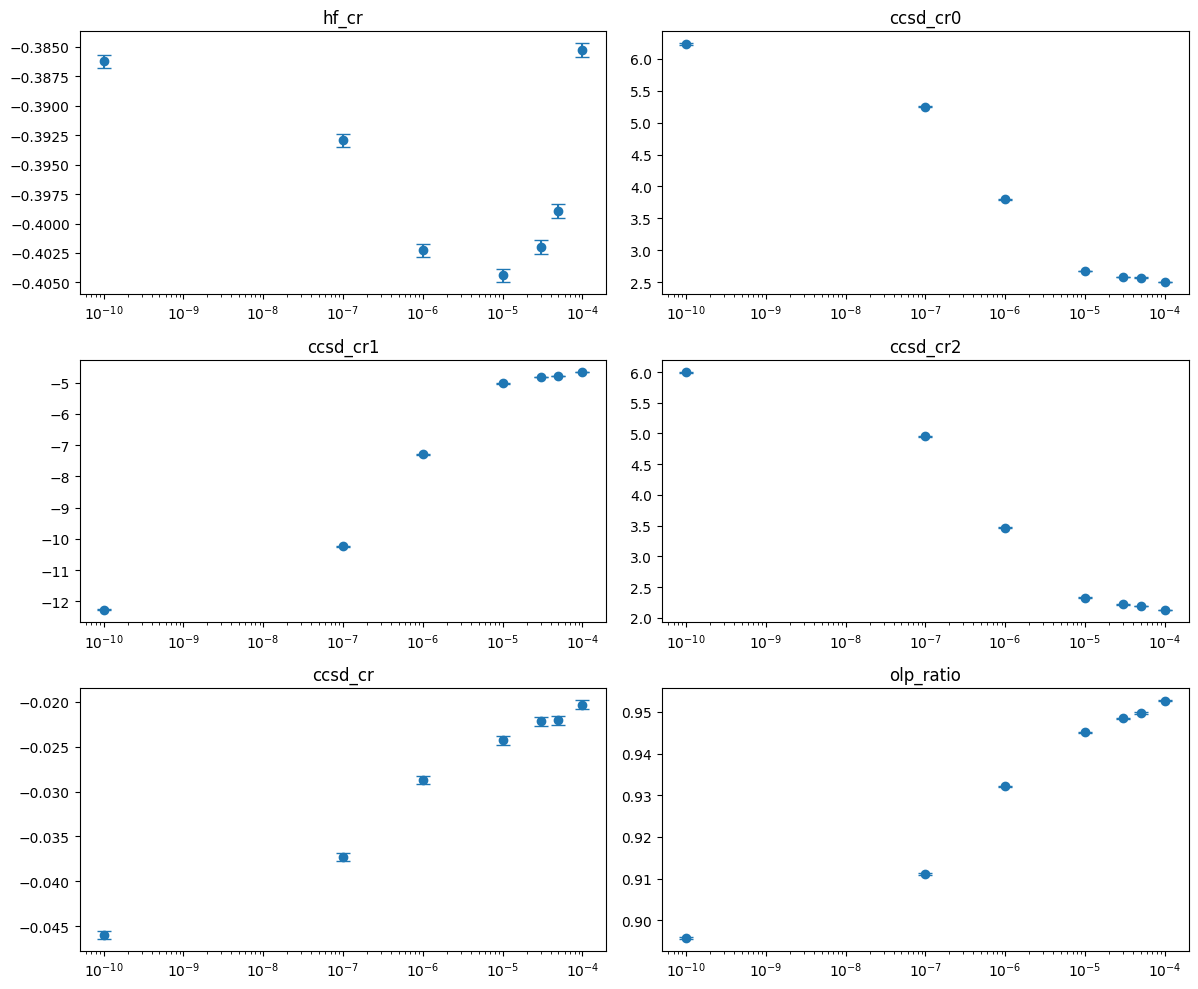

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].errorbar(lno_thresh,hf_cr,yerr=hf_cr_err*2,fmt='o',capsize=5,label='hf_cr')
axs[0, 0].set_title("hf_cr")
axs[0, 0].set_xscale('log')

# Top-right
axs[0, 1].errorbar(lno_thresh,ccsd_cr0,yerr=ccsd_cr0_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[0, 1].set_title("ccsd_cr0")
axs[0, 1].set_xscale('log')

# Bottom-left
axs[1, 0].errorbar(lno_thresh,ccsd_cr1,yerr=ccsd_cr1_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[1, 0].set_title("ccsd_cr1")
axs[1, 0].set_xscale('log')

# Bottom-right
axs[1, 1].errorbar(lno_thresh,ccsd_cr2,yerr=ccsd_cr2_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[1, 1].set_title("ccsd_cr2")
axs[1, 1].set_xscale('log')

axs[2, 0].errorbar(lno_thresh,ccsd_cr,yerr=ccsd_cr_err*2,fmt='o',capsize=5,label='ccsd_cr')
axs[2, 0].set_title("ccsd_cr")
axs[2, 0].set_xscale('log')

axs[2, 1].errorbar(lno_thresh,olp_ratio,yerr=olp_ratio_err*2,fmt='o',capsize=5,label='olp_ratio')
axs[2, 1].set_title("olp_ratio")
axs[2, 1].set_xscale('log')

plt.tight_layout()
plt.show()

In [ ]:
# non-interactive geometry s22 shifted
# converged SCF energy = -152.05327162245
# AFQMC energy: -152.4836 +/- 0.0001
# E(RCCSD) = -152.4761619472993  E_corr = -0.4228903248489593
# one water afqmc/ccsd correlation energy: -0.214983 +/- 0.000060

In [109]:
-0.214983*2

-0.429966

In [2]:
np.set_printoptions(7,suppress=True)
afqmc_corr = -152.4836 - -152.05327162245
print(afqmc_corr)
afqmc_err = 0.0001
ccsd_corr = -0.4228903248489593

-0.43032837754998354


In [3]:
lno_thresh = np.array([0.0001,5e-05,3e-05,1e-05,1e-06,1e-07,1e-10]) # last thresh = 0.0
lno_afqmc_corr = np.array([-0.407164,-0.422362,-0.425080,-0.428981,-0.430238,-0.430279,-0.430152])
lno_afqmc_err = np.array([0.000056,0.000063,0.000064,0.000064,0.000067,0.000071,0.000090])
lno_afqmc_mp2_corr = np.array([-0.428179,-0.429469,-0.429609,-0.429815,-0.430242,-0.430279,-0.430151])
lno_ccsd_corr = np.array([-0.402972,-0.416426,-0.418781,-0.422125,-0.422882,-0.422890,-0.422889])
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr


hf_cr = np.array([-0.386433,-0.400019,-0.402558,-0.404935,-0.406392,-0.406431,-0.384948])
hf_cr_err = np.array([0.000405,0.000402,0.000409,0.000400,0.000409,0.000415,0.000387])
ccsd_cr0 = np.array([2.527066,2.590283,2.603062,2.616211,2.634265,2.635595,5.025653])
ccsd_cr0_err = np.array([0.002900,0.002930,0.002983,0.002938,0.003052,0.003121,0.005896])
ccsd_cr1 = np.array([-4.694503,-4.834434,-4.869481,-4.923248,-4.968765,-4.971751,-9.866932])
ccsd_cr1_err = np.array([0.005507,0.005635,0.005761,0.005695,0.005939,0.006074,0.011762])
ccsd_cr2 = np.array([2.146707,2.221807,2.243893,2.282991,2.310653,2.312310,4.796075])
ccsd_cr2_err = np.array([0.002965,0.003050,0.003130,0.003100,0.003230,0.003299,0.006160])
ccsd_cr = np.array([-0.020730,-0.022342,-0.022524,-0.024045,-0.023848,-0.023847,-0.045205])
ccsd_cr_err = np.array([0.000364,0.000353,0.000359,0.000351,0.000357,0.000360,0.000313])
olp_ratio = np.array([0.952438,0.949244,0.948256,0.945888,0.945184,0.945137,0.896134])
olp_ratio_err = np.array([0.000126,0.000130,0.000134,0.000137,0.000139,0.000137,0.000177])

print(f'lno-threshold: {lno_thresh}')
print(f'lno-afqmc/ccsd correlation energy: {lno_afqmc_corr}')
print(f'lno-ccsd correlation energy: {lno_ccsd_corr}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: {lno_afqmc_mp2_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): {lno_afqmc_err}')
print(f'afqmc/ccsd correlation energy: {afqmc_corr:.4f} +/- {afqmc_err}')

lno-threshold: [0.0001    0.00005   0.00003   0.00001   0.000001  0.0000001 0.       ]
lno-afqmc/ccsd correlation energy: [-0.407164 -0.422362 -0.42508  -0.428981 -0.430238 -0.430279 -0.430152]
lno-ccsd correlation energy: [-0.402972 -0.416426 -0.418781 -0.422125 -0.422882 -0.42289  -0.422889]
mp2 corrected lno-afqmc/ccsd correlation energy: [-0.428179 -0.429469 -0.429609 -0.429815 -0.430242 -0.430279 -0.430151]
lno-afqmc/ccsd energy uncertainty (1 sigma): [0.000056 0.000063 0.000064 0.000064 0.000067 0.000071 0.00009 ]
afqmc/ccsd correlation energy: -0.4303 +/- 0.0001


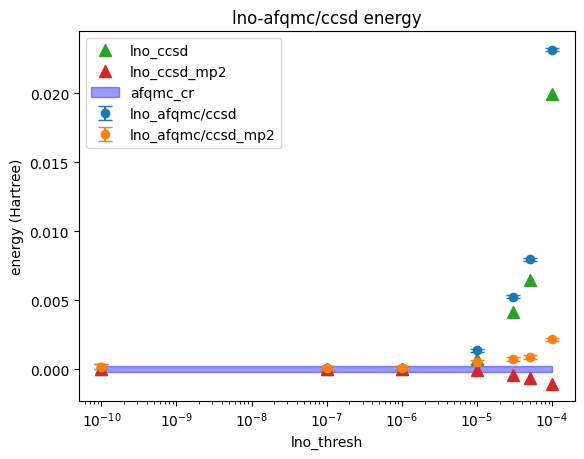

In [4]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()

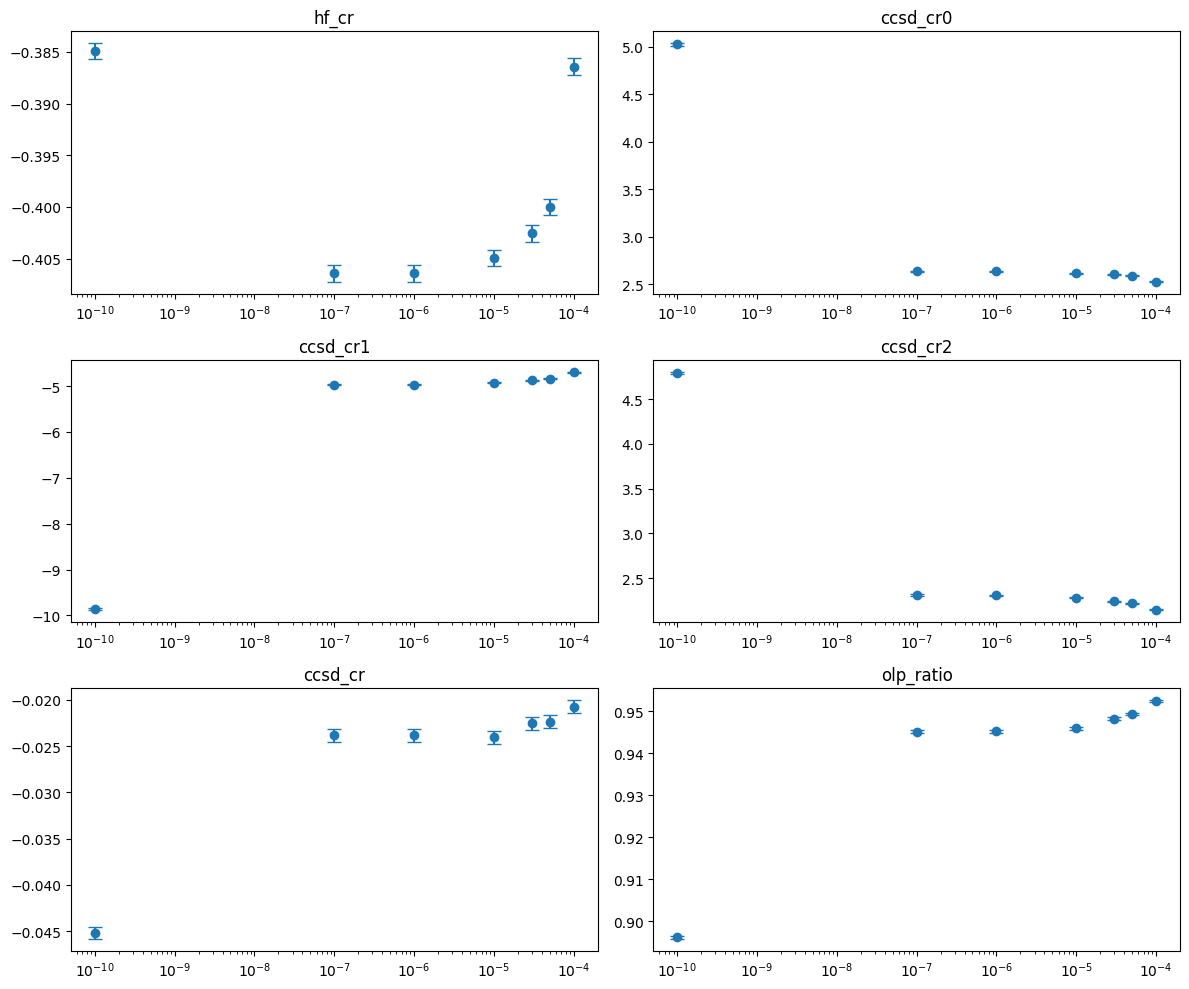

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].errorbar(lno_thresh,hf_cr,yerr=hf_cr_err*2,fmt='o',capsize=5,label='hf_cr')
axs[0, 0].set_title("hf_cr")
axs[0, 0].set_xscale('log')

# Top-right
axs[0, 1].errorbar(lno_thresh,ccsd_cr0,yerr=ccsd_cr0_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[0, 1].set_title("ccsd_cr0")
axs[0, 1].set_xscale('log')

# Bottom-left
axs[1, 0].errorbar(lno_thresh,ccsd_cr1,yerr=ccsd_cr1_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[1, 0].set_title("ccsd_cr1")
axs[1, 0].set_xscale('log')

# Bottom-right
axs[1, 1].errorbar(lno_thresh,ccsd_cr2,yerr=ccsd_cr2_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[1, 1].set_title("ccsd_cr2")
axs[1, 1].set_xscale('log')

axs[2, 0].errorbar(lno_thresh,ccsd_cr,yerr=ccsd_cr_err*2,fmt='o',capsize=5,label='ccsd_cr')
axs[2, 0].set_title("ccsd_cr")
axs[2, 0].set_xscale('log')

axs[2, 1].errorbar(lno_thresh,olp_ratio,yerr=olp_ratio_err*2,fmt='o',capsize=5,label='olp_ratio')
axs[2, 1].set_title("olp_ratio")
axs[2, 1].set_xscale('log')

plt.tight_layout()
plt.show()

In [8]:
# non-interactive water geometry the same one water
# converged SCF energy = -152.053493822151
# AFQMC energy: -152.4836 +/- 0.0001
# E(RCCSD) = -152.4761812242837  E_corr = -0.4226874021327313
# one water afqmc/ccsd correlation energy: -0.214983 +/- 0.000060
np.set_printoptions(7,suppress=True)
afqmc_corr = -152.4836 - -152.053493822151
print(afqmc_corr)
afqmc_err = 0.0001
ccsd_corr = -0.4226874021327313


-0.43010617784898386


In [2]:
-0.214937*2

-0.429874

In [9]:
# non-interactive water geometry the same one water
data = '''
#  thresh(occ,vir)  afqmc_corr  err  mp2_afqmc_corr  ccsd_corr  hf_cr err ccsd_cr0 err ccsd_cr1 err  ccsd_cr2  err  ccsd_cr  err  ave_olp_ratio  err  ave_norb  max_norb  ave_nelec  max_nelec  run_time
 (1.00e-03,1.00e-04) -0.405289  0.000057 -0.427696  -0.400688 -0.384153  0.000381 2.531076  0.002782 -4.713023  0.005314 2.160810  0.002866 -0.021136  0.000341 0.950834  0.000132 8.00   8 14.50  17 2119.55
 (5.00e-04,5.00e-05) -0.422640  0.000062 -0.429359  -0.416202 -0.399749  0.000384 2.595206  0.002832 -4.864574  0.005475 2.246474  0.002970 -0.022890  0.000338 0.948163  0.000135 8.00   8 18.00  20 2837.65
 (3.00e-04,3.00e-05) -0.427026  0.000064 -0.429815  -0.420034 -0.404100  0.000392 2.615002  0.002874 -4.910628  0.005586 2.272700  0.003043 -0.022925  0.000343 0.947002  0.000137 8.00   8 19.25  21 3107.06
 (1.00e-04,1.00e-05) -0.428982  0.000064 -0.429749  -0.422034 -0.404854  0.000380 2.615483  0.002856 -4.924446  0.005557 2.284833  0.003023 -0.024128  0.000333 0.945787  0.000135 8.00   8 20.50  21 3374.55
 (1.00e-05,1.00e-06) -0.429983  0.000068 -0.429992  -0.422672 -0.405929  0.000390 2.627704  0.002985 -4.954906  0.005834 2.303150  0.003171 -0.024054  0.000339 0.945265  0.000138 8.00   8 22.75  23 4315.72
 (1.00e-06,1.00e-07) -0.430001  0.000066 -0.430000  -0.422688 -0.405731  0.000383 2.626789  0.002884 -4.953780  0.005644 2.302723  0.003072 -0.024269  0.000336 0.945298  0.000136 8.00   8 23.00  23 4384.71
 (0.00e+00,0.00e+00) -0.429915  0.000086 -0.429914  -0.422688 -0.384581  0.000364 5.015806  0.005610 -9.846325  0.011206 4.785186  0.005870 -0.045336  0.000296 0.896287  0.000178 16.00   16 46.00  46 32973.65
'''

In [10]:
new_data = []
lines = data.splitlines()
for line in lines:
    columns = line.split()
    if len(columns)>1:
        if not line.startswith("#"): 
            new_data.append(columns)

new_data = np.array(new_data)

lno_thresh = []
for i in range(new_data.shape[0]):
    thresh_vir = new_data[:,0][i].split(sep=',')[1]
    thresh_vir = float(thresh_vir.strip('(),'))
    lno_thresh.append(thresh_vir)

lno_data = np.array(new_data[:,1:],dtype="float32")

lno_thresh = np.array(lno_thresh,dtype="float32")
lno_thresh[-1] = 1e-10 # last thresh = 0.0
lno_afqmc_corr = lno_data[:,0]
lno_afqmc_err = lno_data[:,1]
lno_afqmc_mp2_corr = lno_data[:,2]
lno_ccsd_corr = lno_data[:,3]
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr

hf_cr = lno_data[:,4]
hf_cr_err = lno_data[:,5]
ccsd_cr0 = lno_data[:,6]
ccsd_cr0_err = lno_data[:,7]
ccsd_cr1 = lno_data[:,8]
ccsd_cr1_err = lno_data[:,9]
ccsd_cr2 = lno_data[:,10]
ccsd_cr2_err = lno_data[:,11]
ccsd_cr = lno_data[:,12]
ccsd_cr_err = lno_data[:,13]
olp_ratio = lno_data[:,14]
olp_ratio_err = lno_data[:,15]

print(f'lno-threshold: {lno_thresh}')
print(f'lno-afqmc/ccsd correlation energy: {lno_afqmc_corr}')
print(f'lno-ccsd correlation energy: {lno_ccsd_corr}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: {lno_afqmc_mp2_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): {lno_afqmc_err}')
print(f'afqmc/ccsd correlation energy: {afqmc_corr:.6f} +/- {afqmc_err:6f}')
print(f'ccsd correlation energy: {ccsd_corr:.6f}')

lno-threshold: [0.0001    0.00005   0.00003   0.00001   0.000001  0.0000001 0.       ]
lno-afqmc/ccsd correlation energy: [-0.405289 -0.42264  -0.427026 -0.428982 -0.429983 -0.430001 -0.429915]
lno-ccsd correlation energy: [-0.400688 -0.416202 -0.420034 -0.422034 -0.422672 -0.422688 -0.422688]
mp2 corrected lno-afqmc/ccsd correlation energy: [-0.427696 -0.429359 -0.429815 -0.429749 -0.429992 -0.43     -0.429914]
lno-afqmc/ccsd energy uncertainty (1 sigma): [0.000057 0.000062 0.000064 0.000064 0.000068 0.000066 0.000086]
afqmc/ccsd correlation energy: -0.430106 +/- 0.000100
ccsd correlation energy: -0.422687


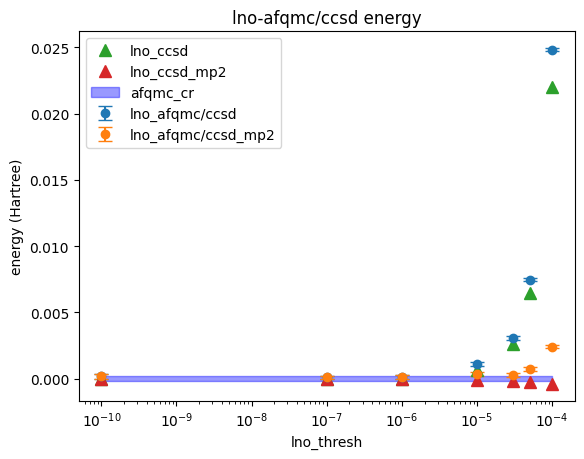

In [11]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()

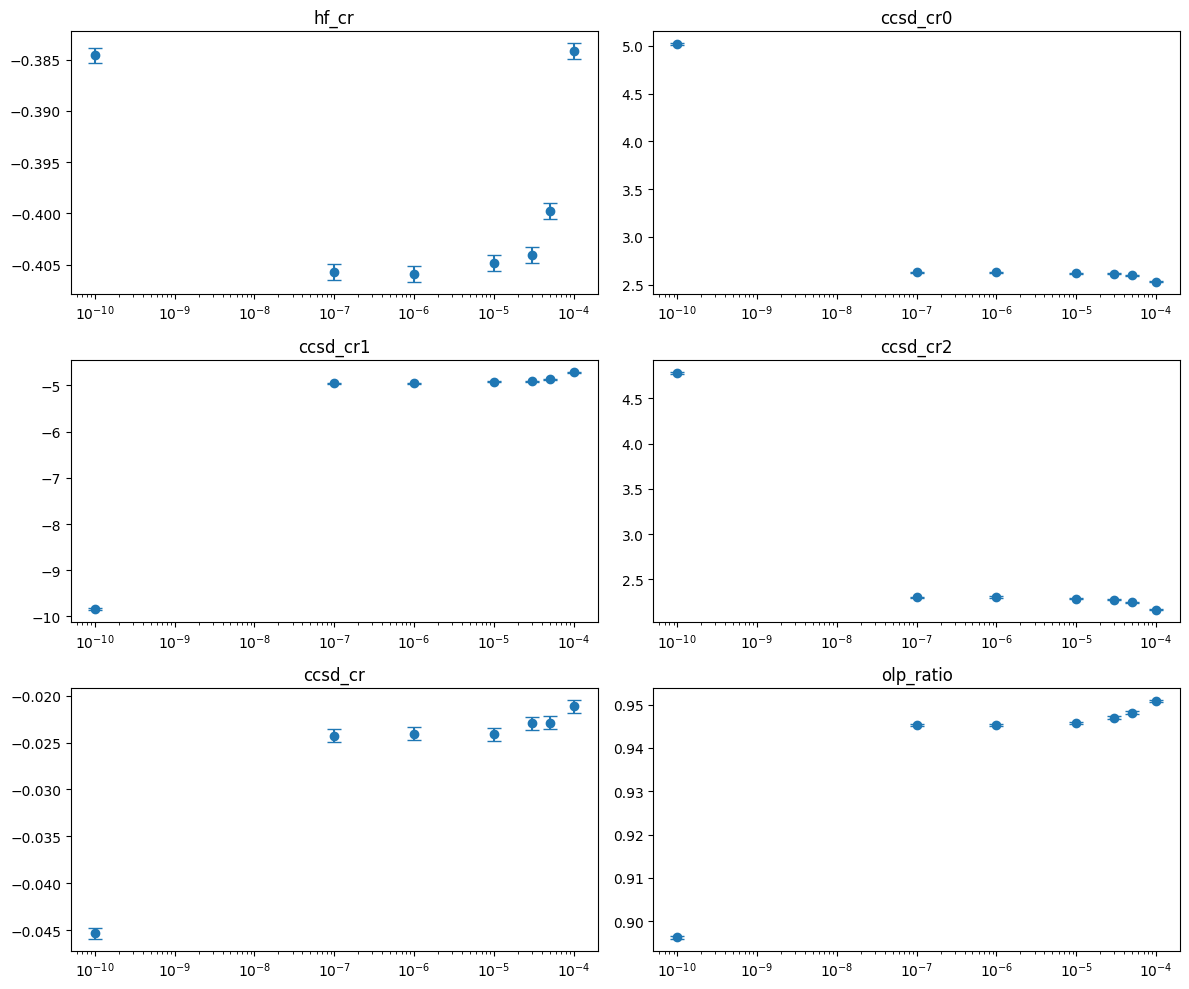

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].errorbar(lno_thresh,hf_cr,yerr=hf_cr_err*2,fmt='o',capsize=5,label='hf_cr')
axs[0, 0].set_title("hf_cr")
axs[0, 0].set_xscale('log')

# Top-right
axs[0, 1].errorbar(lno_thresh,ccsd_cr0,yerr=ccsd_cr0_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[0, 1].set_title("ccsd_cr0")
axs[0, 1].set_xscale('log')

# Bottom-left
axs[1, 0].errorbar(lno_thresh,ccsd_cr1,yerr=ccsd_cr1_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[1, 0].set_title("ccsd_cr1")
axs[1, 0].set_xscale('log')

# Bottom-right
axs[1, 1].errorbar(lno_thresh,ccsd_cr2,yerr=ccsd_cr2_err*2,fmt='o',capsize=5,label='ccsd_cr0')
axs[1, 1].set_title("ccsd_cr2")
axs[1, 1].set_xscale('log')

axs[2, 0].errorbar(lno_thresh,ccsd_cr,yerr=ccsd_cr_err*2,fmt='o',capsize=5,label='ccsd_cr')
axs[2, 0].set_title("ccsd_cr")
axs[2, 0].set_xscale('log')

axs[2, 1].errorbar(lno_thresh,olp_ratio,yerr=olp_ratio_err*2,fmt='o',capsize=5,label='olp_ratio')
axs[2, 1].set_title("olp_ratio")
axs[2, 1].set_xscale('log')

plt.tight_layout()
plt.show()

In [13]:
# s22 interactive water dimer ccpvtz
# converged SCF energy = -152.120939414676
# AFQMC energy: -152.6753 +/- 0.0001
# E(RCCSD) = -152.6587170274967  E_corr = -0.537777612820991

np.set_printoptions(7,suppress=True)
afqmc_corr = -152.6753 - -152.12093941
print(afqmc_corr)
afqmc_err = 0.0001
ccsd_corr = -0.537777612

-0.5543605899999875
